In [1]:
from fastai.vision.all import *
from fastai.interpret import *
from fastai.vision.widgets import *

In [2]:
path = "/tmp/cg-training-set"
failed = verify_images(get_image_files(path))
failed

(#0) []

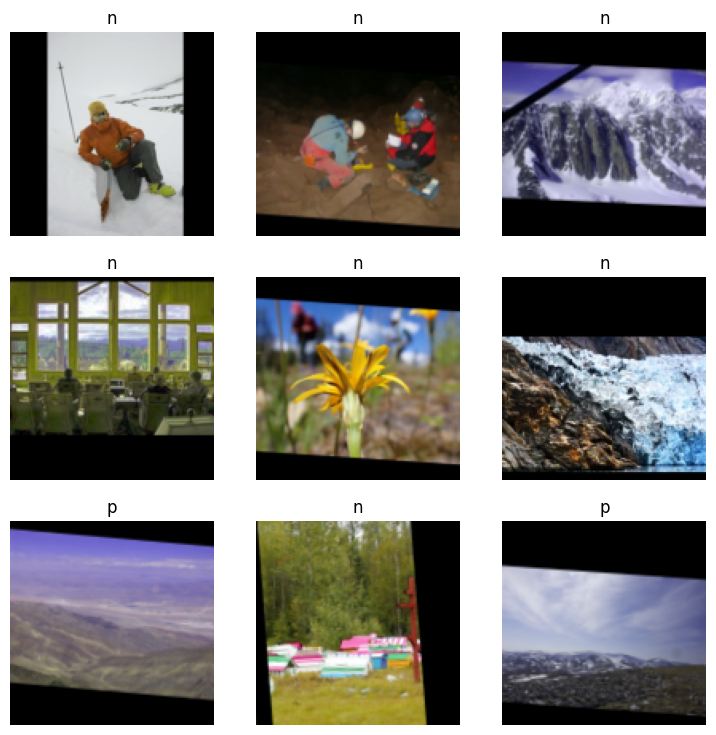

In [3]:
data_block = DataBlock(
    blocks=[ImageBlock, CategoryBlock],
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[
        Resize(method="pad", pad_mode="zeros", size=128),
    ],
    batch_tfms=[
        Brightness(),
        Contrast(max_lighting=0.5),
        Hue(),
        Rotate(max_deg=5),
    ]
)
dls = data_block.dataloaders(path)
dls.show_batch()

In [4]:
l = vision_learner(dls, resnet18, metrics=[accuracy])
l.fine_tune(5)

# With the first training set I got a max accuracy of 84.88% on epoch 4
# The expanded set of ~8,000 brings that up to 88.4% on epoch 4
# Round 1 of cleaning: 88.3%
# Round 2 of cleaning: 89.5%
# Round 3 of cleaning: 89.2%

epoch,train_loss,valid_loss,accuracy,time
0,0.701339,0.578572,0.780899,00:32


epoch,train_loss,valid_loss,accuracy,time
0,0.487358,0.390578,0.850811,00:40
1,0.384194,0.347125,0.862047,00:40
2,0.279760,0.294608,0.875156,00:40
3,0.206865,0.311768,0.879526,00:41
4,0.182853,0.308372,0.892010,00:39


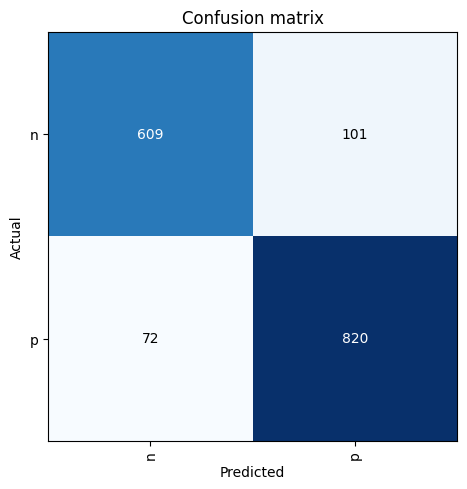

In [5]:
interp = ClassificationInterpretation.from_learner(l)
interp.plot_confusion_matrix()

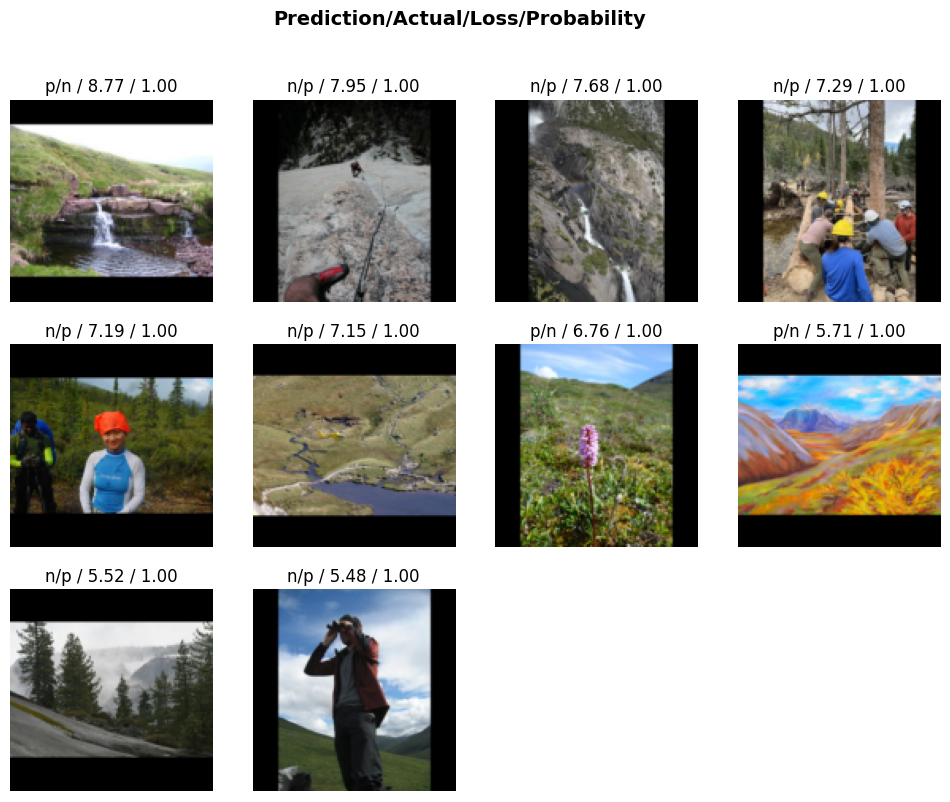

In [6]:
interp.plot_top_losses(10)

In [7]:
cleaner = ImageClassifierCleaner(l)
cleaner

In [8]:
print("Delete: ", cleaner.delete())
print("Change: ", cleaner.change())
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path + "/" + cat)

Delete:  []
Change:  []


In [9]:
# What if we train for longer?
l.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,0.179897,0.319340,0.887640,00:33


epoch,train_loss,valid_loss,accuracy,time
0,0.171303,0.320553,0.883895,00:38
1,0.170606,0.349854,0.873908,00:39
2,0.158693,0.365138,0.877029,00:39
3,0.138650,0.349065,0.878901,00:40


KeyboardInterrupt: 